In [ ]:
!nvidia-smi

Thu Dec 15 05:56:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    31W /  70W |   1950MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [1]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 238 kB 28.8 MB/s 
     |████████████████████████████████| 51 kB 8.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     |████████████████████████████████| 46.1 MB 1.2 MB/s 
     |████████████████████████████████| 190 kB 14.6 MB/s 


### Step 2. Install MMDetection from the source.

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 33254, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 33254 (delta 11), reused 42 (delta 5), pack-reused 33183
Receiving objects: 100% (33254/33254), 45.17 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (23493/23493), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet


### Step 3. Verification

In [3]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.26.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [4]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 74.2 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [6]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


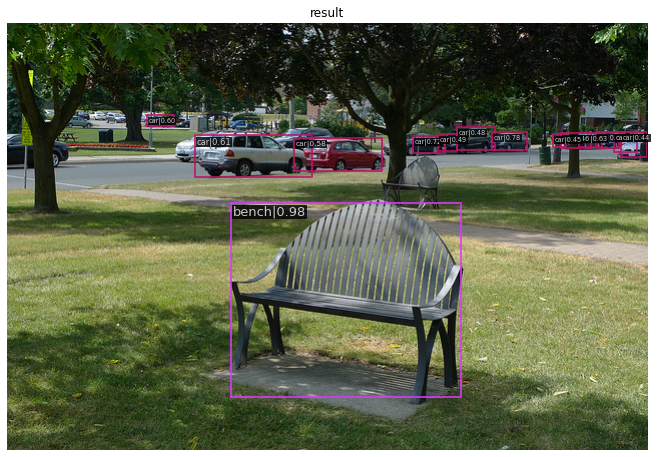

In [7]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'demo/demo.jpg', result, score_thr=0.4)

# 2. Inference with Faster-RCNN
- MS-COCO 데이터 기반으로 학습된 Faster RCNN Pretrained 모델을 활용하여 Inference 수행

- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

## Download pretrained model
- github의 configs/faster_rcnn 디렉토리의 Results and Models 섹션 확인
- 1x : epoch 12회, 2x : epoch 24회

In [9]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2023-01-03 01:21:00--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.206, 47.246.48.205, 47.246.48.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  69.0MB/s    in 2.3s    

2023-01-03 01:21:03 (69.0 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



## Initialize Detector and Inference

- github의 demo 디렉토리 아래 [inference_demo.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/inference_demo.ipynb) 파일 참조 

In [10]:
from mmdet.apis import init_detector, inference_detector

# mmdetection 디렉토리 기준으로 상대 경로 지정
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'
# test sample에 대해 inference 수행
result = inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [ ]:
model

In [12]:
# results는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 
# 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
# 개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임
type(result), len(result)

(list, 80)

In [13]:
result[0].shape, result[1].shape, result[2].shape, result[3].shape

((3, 5), (0, 5), (46, 5), (0, 5))

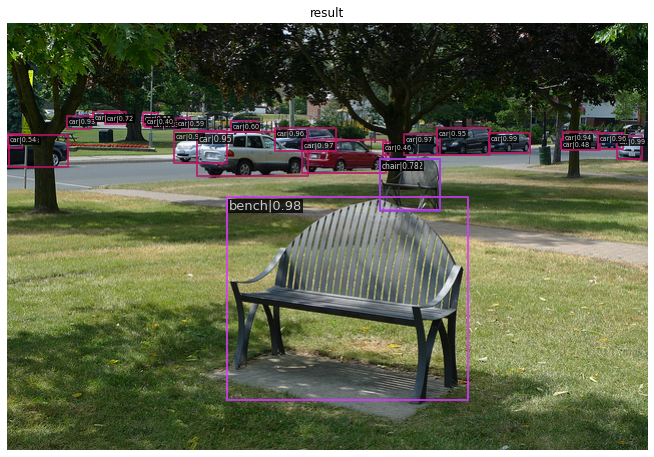

In [14]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'demo/demo.jpg', result, score_thr=0.4)

## Video Inference
- github의 demo 디렉토리 아래 [video_demo.py](https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py) 파일 참조 

In [16]:
!mkdir data

In [17]:
!wget -c https://github.com/mue76/data/raw/master/fast_furious_Trim.mp4 \
      -O data/fast_furious_Trim.mp4

--2023-01-03 01:37:18--  https://github.com/mue76/data/raw/master/fast_furious_Trim.mp4
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mue76/data/master/fast_furious_Trim.mp4 [following]
--2023-01-03 01:37:18--  https://raw.githubusercontent.com/mue76/data/master/fast_furious_Trim.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18564995 (18M) [application/octet-stream]
Saving to: ‘data/fast_furious_Trim.mp4’

data/fast_furious_T 100%[===================>]  17.70M  --.-KB/s    in 0.06s   

2023-01-03 01:37:19 (315 MB/s) - ‘data/fast_furious_Trim.mp4’ saved [18564995/18564995]



In [ ]:
# !wget -c https://github.com/mue76/data/raw/master/car_chasing.mp4 \
#       -O data/car_chasing.mp4

In [18]:
import cv2
import mmcv

video_reader = mmcv.VideoReader('./data/fast_furious_Trim.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('./data/fast_furious_Trim_out.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.5)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1882/1882, 3.1 task/s, elapsed: 600s, ETA:     0s


In [ ]:
!cp ./data/fast_furious_Trim_out.mp4 /content/drive/MyDrive/Classroom/data/out